##### Step1: Libraries
##### Step2: Initial and Transition Probablities
##### Step3: Generate the words
##### Step4: Generate words that they anre multiplay
##### Step5: Count Frequencies

In [4]:
##############################################################################
# Step1: Import the necessary libraries. We will use `numpy` for random choices 
# and `Counter` to calculate word frequencies later.
import numpy as np
from collections import Counter
# Define the initial probabilities and transition probabilities as given in the problem.
AG_initialProbabilities = {'a': 0.3, 'c': 0.2, 'e': 0.1, 't': 0.4}
AG_transitionProbabilities = {
    'a': {'a': 0.0, 'c': 0.4, 'e': 0.0, 't': 0.6},
    'c': {'a': 0.2, 'c': 0.0, 'e': 0.4, 't': 0.4},
    'e': {'a': 0.5, 'c': 0.0, 'e': 0.0, 't': 0.5},
    't': {'a': 0.4, 'c': 0.0, 'e': 0.6, 't': 0.0}
}
##############################################################################
# Step2: Define a function to generate a word based on the transition probabilities.
# This function simulates state transitions to generate words of the desired length.
def AG_generateWord(word_length):
    AG_states = list(AG_initialProbabilities.keys())  # Extract the states from the probabilities
    AG_generatedWord = []  # Initialize an empty list to store the generated word
    AG_currentState = np.random.choice(AG_states, p=list(AG_initialProbabilities.values()))
    AG_generatedWord.append(AG_currentState)
    for _ in range(word_length - 1):  # Transition through states based on the probabilities
        AG_nextState = np.random.choice(AG_states, p=list(AG_transitionProbabilities[AG_currentState].values()))
        AG_generatedWord.append(AG_nextState)
        AG_currentState = AG_nextState
    return ''.join(AG_generatedWord)
##############################################################################
# Step3: Define a function to create multiple words based on the above-defined generation logic.
# This function generates multiple words of a specified length.
def AG_generateMultipleWords(total_words, word_length):
    AG_generatedWordsList = []
    for _ in range(total_words):
        AG_generatedWordsList.append(AG_generateWord(word_length))
    return AG_generatedWordsList
##############################################################################
# Step4: Generate a large number of words and compute their frequencies.
# For this example, we generate 1,000,000 words of length 3 and calculate their frequencies.
AG_generatedWords = AG_generateMultipleWords(1000000, 3)
AG_wordFrequencies = Counter(AG_generatedWords)
AG_totalGeneratedWords = sum(AG_wordFrequencies.values())

##### Step5: Result of Probabilities

Target Word: cat
Frequency: 23882
Estimated Probability: 0.023882
Target Word: eat
Frequency: 30096
Estimated Probability: 0.030096
Target Word: act
Frequency: 47982
Estimated Probability: 0.047982
Target Word: tea
Frequency: 119659
Estimated Probability: 0.119659


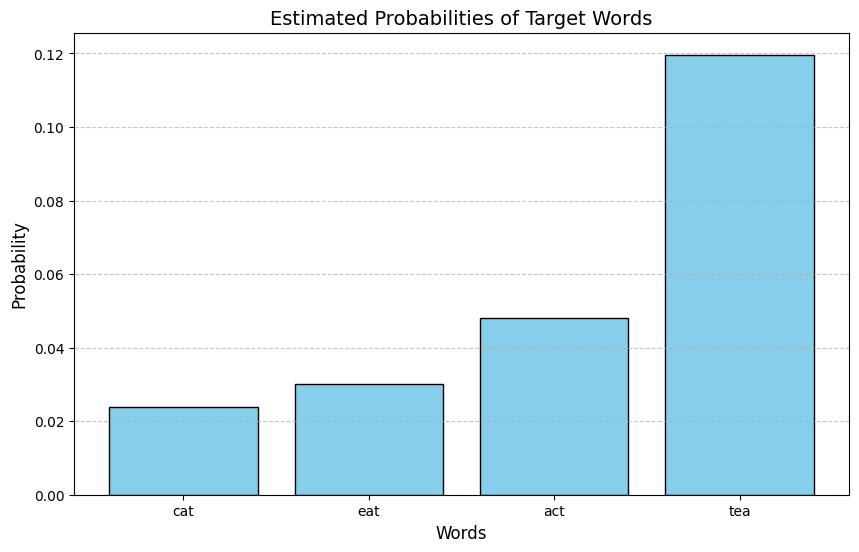

In [3]:
##############################################################################
# Step5: Calculate and visualize the probabilities of specific target words.
# Define the target words for which probabilities need to be computed.
import matplotlib.pyplot as plt
AG_targetWords = ['cat', 'eat', 'act', 'tea']
AG_frequencies = []
AG_probabilities = []
for AG_targetWord in AG_targetWords:
    AG_frequency = AG_wordFrequencies[AG_targetWord]
    AG_probability = AG_frequency / AG_totalGeneratedWords
    AG_frequencies.append(AG_frequency)
    AG_probabilities.append(AG_probability)
    print(f"Target Word: {AG_targetWord}")
    print(f"Frequency: {AG_frequency}")
    print(f"Estimated Probability: {AG_probability:.6f}")
# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(AG_targetWords, AG_probabilities, color='skyblue', edgecolor='black')
plt.title('Estimated Probabilities of Target Words', fontsize=14)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()